## Imports

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat

In [3]:
PATH = "1993/data/"

In [4]:
clmNames = ['Date','Time','Lat','Lon','PkCur','Mult']

In [5]:
%time df_raw = pd.read_csv(f'{PATH}nldn.txt', low_memory=False, delim_whitespace=True,names=clmNames,parse_dates=['Date'])

CPU times: user 153 ms, sys: 34 ms, total: 187 ms
Wall time: 185 ms


In [6]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [7]:
display_all(df_raw.head())
display_all(df_raw.tail())

,Date,Time,Lat,Lon,PkCur,Mult
0,1993-03-11,00:00:00,37.819,-72.975,-145.5,2
1,1993-03-11,00:00:00,38.001,-72.708,-185.8,3
2,1993-03-11,00:00:01,38.104,-72.704,-211.0,2
3,1993-03-11,00:00:02,38.801,-73.528,-155.9,2
4,1993-03-11,00:00:10,38.162,-72.752,-240.4,1


,Date,Time,Lat,Lon,PkCur,Mult
85455,1993-03-14,23:48:14,40.603,-116.187,-254.6,1
85456,1993-03-14,23:50:06,40.594,-116.040,-122.2,1
85457,1993-03-14,23:50:07,40.589,-115.997,-125.5,1
85458,1993-03-14,23:50:07,40.630,-115.995,-112.5,1
85459,1993-03-14,23:55:41,40.509,-115.993,-157.1,1


In [8]:
dates = df_raw['Date']

In [18]:
subset12 = df_raw.loc[dates.between('1993-03-11','1993-03-13',inclusive=False)]

In [19]:
subset12

,Date,Time,Lat,Lon,PkCur,Mult
19353,1993-03-12,00:00:06,31.916,-95.425,236.6,1
19354,1993-03-12,00:00:09,32.868,-99.791,-172.1,2
19355,1993-03-12,00:00:10,27.994,-98.095,-202.4,1
19356,1993-03-12,00:00:15,30.759,-96.981,-79.8,3
19357,1993-03-12,00:00:18,33.561,-98.926,-73.7,1
...,...,...,...,...,...,...
47984,1993-03-12,23:59:24,27.400,-86.911,-232.0,1
47985,1993-03-12,23:59:34,28.388,-86.559,-146.8,4
47986,1993-03-12,23:59:41,26.279,-86.181,-223.6,3
47987,1993-03-12,23:59:42,28.354,-86.280,231.0,1


In [20]:
lats = subset12['Lat'].values
lats

array([31.916, 32.868, 27.994, ..., 26.279, 28.354, 28.678])

In [21]:
lons = subset12['Lon'].values
lons

array([-95.425, -99.791, -98.095, ..., -86.181, -86.28 , -86.602])

In [22]:
# Set the domain to gather data from and for defining the plot region.
latN = 35
latS = 21
lonW = -110 + 360
lonE = -78 + 360
cLat = (latN + latS)/2
cLon = (lonW + lonE )/2
lat_range=np.arange(latN,latS-.25,-.25)
lon_range=np.arange(lonW,lonE+0.25,0.25)

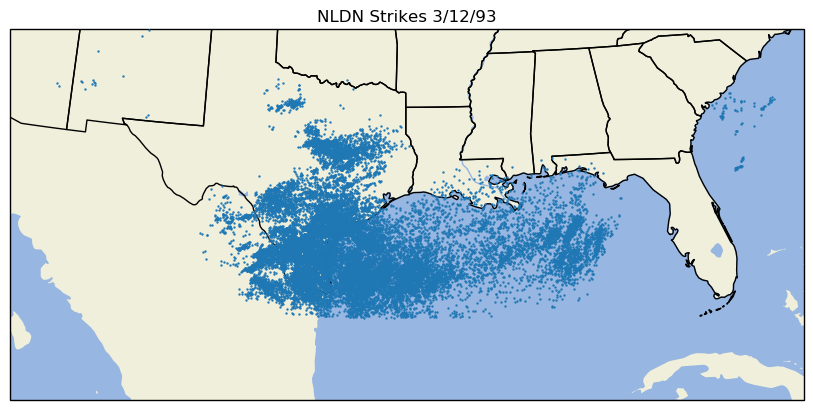

In [24]:
# Set up a plot with map features

dpi = 100
xpix = 1024
ypix = 768
# Figsize is always in inches.  Inches * dpi = pixels.  The line below will produce a 1024 x 768 png when saved to disk.
fig = plt.figure(figsize=(xpix/100,ypix/100), dpi=dpi)

proj = ccrs.Stereographic(central_longitude=cLon, central_latitude=cLat)
ax = fig.add_subplot(1, 1, 1, projection=proj)
land_mask = cfeat.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor=cfeat.COLORS['land'])
sea_mask = cfeat.NaturalEarthFeature('physical', 'ocean', '50m',
                                        edgecolor='face',
                                        facecolor=cfeat.COLORS['water'])
lake_mask = cfeat.NaturalEarthFeature('physical', 'lakes', '50m',
                                        edgecolor='face',
                                        facecolor=cfeat.COLORS['water'])
ax.add_feature(land_mask)
ax.add_feature(sea_mask)
ax.add_feature(lake_mask)


# The features with names such as cfeat.LAND, cfeat.OCEAN, are lower-resolution (110m) shapefiles from the
# Naturalearth repository.  Higher resolution shapefiles (10m, 50m) can be used by using the cfeat.NaturalEarthFeature
# method as illustrated above for land and sea masks, and below for state/provinces.
#ax.add_feature (cfeat.LAND)
#ax.add_feature (cfeat.OCEAN)
#ax.add_feature(cfeat.COASTLINE)
#ax.add_feature (cfeat.BORDERS, linestyle=':')
#ax.add_feature (cfeat.LAKES, alpha = 0.5)
ax.add_feature(cfeat.RIVERS)

ax.set_extent ((lonW,lonE,latS,latN))

state_borders = cfeat.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes',
                                         scale='50m', facecolor='none')
ax.add_feature(state_borders, linestyle='solid', edgecolor='black')

plt.title("NLDN Strikes 3/12/93")


#Plot theta-e contours & labels

ax.scatter(lons,lats,s=.5,transform=ccrs.PlateCarree(),zorder=10)

#plt.savefig ('../figures/' + timeStr2 + '_sfmap.png',dpi=dpi)

In [15]:
times = df_raw['Time']
subset1 = subset.loc[times.between('20:59:59','23:59:59.5999999')]
subset1

,Date,Time,Lat,Lon,PkCur,Mult
45879,1993-03-12,21:00:11,27.693,-89.456,-123.4,1
45880,1993-03-12,21:00:26,27.341,-89.256,-292.9,1
45881,1993-03-12,21:00:32,27.369,-89.280,-265.7,4
45882,1993-03-12,21:00:54,27.698,-86.630,-205.7,1
45883,1993-03-12,21:01:02,27.404,-89.292,-310.3,2
...,...,...,...,...,...,...
85317,1993-03-13,22:51:00,42.780,-71.008,-290.5,1
85318,1993-03-13,23:07:20,43.021,-76.181,-235.9,1
85319,1993-03-13,23:18:26,39.218,-75.810,-182.9,1
85320,1993-03-13,23:40:00,44.478,-73.421,340.6,1


In [ ]:
lats = df_raw['Lat']
lons = df_raw['Lon']
subset2 = subset1.loc[lats.between(37.999,40.0001)]
subset3 = subset2.loc[lons.between(-100.0001,-93.9999)]
subset3

In [ ]:
subset3.to_csv('/kt11/ktyle/nldn/tipton_nldn.csv')

In [ ]:
CG = subset3['C or G']

subset4 = subset3[(CG == 'G')]

In [ ]:
subset4CG.eq

In [ ]:
cur = subset4['PkCur']
subset5 = subset4[(cur > 0)]
subset5